## This notebook generates Figures 5A and 5B in the paper. It plots the binned distribution of the diffBUM-HMM, deltaSHAPE and dStruct analyses.

In [1]:
! pip install pandas numpy matplotlib

In [1]:
import os
import sys
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['axes.formatter.useoffset'] = False

%matplotlib inline

In [2]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

### Loading the data:

In [3]:
alldata  = pd.read_csv('../../../Data/New_data_table_Xist.txt',sep="\t",header=0,index_col=0)
alldata

,nucleotide,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,SHAPE_reactivity_ex_vivo_1,SHAPE_reactivity_ex_vivo_2,SHAPE_reactivity_in_cell_1,...,dStruct_scaled,unmodified,ex_vivo,in_vivo,both,scaled_unmodified,scaled_ex_vivo,scaled_in_vivo,scaled_both,base_paired_to
1,C,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0
2,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.712398,0.131639,0.131639,0.024325,0.712398,0.131639,0.131639,0.024325,15
3,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.761379,0.111191,0.111191,0.016238,0.761379,0.111191,0.111191,0.016238,14
4,C,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.795446,0.096432,0.096432,0.011690,0.795446,0.096432,0.096432,0.011690,13
5,T,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.819621,0.085708,0.085708,0.008963,0.819621,0.085708,0.085708,0.008963,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,T,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.819621,0.085708,0.085708,0.008963,0.819621,0.085708,0.085708,0.008963,17897
17915,T,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.795446,0.096432,0.096432,0.011690,0.795446,0.096432,0.096432,0.011690,0
17916,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.761379,0.111191,0.111191,0.016238,0.761379,0.111191,0.111191,0.016238,17418
17917,A,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0,0.712398,0.131639,0.131639,0.024325,0.712398,0.131639,0.131639,0.024325,17417


### Masking positions with no coverage:

In [4]:
positionstomask = alldata[(alldata["SHAPE_reactivity_ex_vivo_1"] < -900) | 
                          (alldata["SHAPE_reactivity_ex_vivo_2"] < -900) |
                          (alldata["SHAPE_reactivity_in_cell_1"] < -900) | 
                          (alldata["SHAPE_reactivity_in_cell_2"] < -900)].index
len(positionstomask)

2517

In [5]:
alldata.columns[11:]

Index(['deltaSHAPE_rep1', 'deltaSHAPE_rep2', 'dStruct', 'dStruct_scaled',
       'unmodified', 'ex_vivo', 'in_vivo', 'both', 'scaled_unmodified',
       'scaled_ex_vivo', 'scaled_in_vivo', 'scaled_both', 'base_paired_to'],
      dtype='object')

In [6]:
alldata.loc[positionstomask,alldata.columns[11:]] = np.nan

In [7]:
a= pd.read_csv('../../../Data/Xist_LMR_values/LMR T1 - C1_exvivo.txt')

a.index = np.arange(1,len(a)+1)

b= pd.read_csv('../../../Data/Xist_LMR_values/LMR T2 - C2_exvivo.txt',sep="\t",header=0)
b.index = np.arange(1,len(b)+1)

c= pd.read_csv('../../../Data/Xist_LMR_values/LMR T1 - C1_invivo.txt',sep="\t",header=0)
c.index = np.arange(1,len(c)+1)

d= pd.read_csv('../../../Data/Xist_LMR_values/LMR T2 - C2_invivo.txt',sep="\t",header=0)
d.index = np.arange(1,len(d)+1)

e= pd.read_csv('../../../Data/Xist_LMR_values/LMR T1 - C2_exvivo.txt')
e
e.index = np.arange(1,len(e)+1)

f= pd.read_csv('../../../Data/Xist_LMR_values/LMR T1 - C2_invivo.txt')

f.index = np.arange(1,len(f)+1)


g= pd.read_csv('../../../Data/Xist_LMR_values/LMR T2 - C1_exvivo.txt')

g.index = np.arange(1,len(g)+1)

h= pd.read_csv('../../../Data/Xist_LMR_values/LMR T2 - C1_invivo.txt')

h.index = np.arange(1,len(h)+1)



alldata['LMRT1C1EXVIVO'] = a['NA'] 
alldata['LMRT2C2EXVIVO'] = b['NA']
alldata['LMRT1C1INVIVO'] = c['NA']
alldata['LMRT2C2INVIVO'] = d['NA']

alldata['LMRT1C2EXVIVO'] = e['NA'] 
alldata['LMRT2C1EXVIVO'] = g['NA']
alldata['LMRT1C2INVIVO'] = f['NA']
alldata['LMRT2C1INVIVO'] = h['NA']


alldata

alldata['LMRT1C1EXVIVO'] = alldata['LMRT1C1EXVIVO'].fillna(0)

alldata['LMRT2C2EXVIVO'] = alldata['LMRT2C2EXVIVO'].fillna(0)

alldata['LMRT1C1INVIVO'] = alldata['LMRT1C1INVIVO'].fillna(0)

alldata['LMRT2C2INVIVO'] = alldata['LMRT2C2INVIVO'].fillna(0)

alldata['LMRT1C2EXVIVO'] = alldata['LMRT1C2EXVIVO'].fillna(0)
alldata['LMRT2C1EXVIVO'] = alldata['LMRT2C1EXVIVO'].fillna(0)
alldata['LMRT1C2INVIVO'] = alldata['LMRT1C2INVIVO'].fillna(0)
alldata['LMRT2C1INVIVO'] = alldata['LMRT2C1INVIVO'].fillna(0)



alldata['LMRT1C1'] =  alldata['LMRT1C1EXVIVO'] - alldata['LMRT1C1INVIVO'] 
alldata['LMRT2C2'] =  alldata['LMRT2C2EXVIVO'] - alldata['LMRT2C2INVIVO'] 

alldata['LMRT1C2'] =  alldata['LMRT1C2EXVIVO'] - alldata['LMRT1C2INVIVO'] 
alldata['LMRT2C1'] =  alldata['LMRT2C1EXVIVO'] - alldata['LMRT2C1INVIVO'] 



alldata['LMRT1C1'] = alldata['LMRT1C1'].abs()
alldata['LMRT2C2'] = alldata['LMRT2C2'].abs()

alldata['LMRT1C2'] = alldata['LMRT1C2'].abs()
alldata['LMRT2C1'] = alldata['LMRT2C1'].abs()


alldata

,nucleotide,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,SHAPE_reactivity_ex_vivo_1,SHAPE_reactivity_ex_vivo_2,SHAPE_reactivity_in_cell_1,...,LMRT1C1INVIVO,LMRT2C2INVIVO,LMRT1C2EXVIVO,LMRT2C1EXVIVO,LMRT1C2INVIVO,LMRT2C1INVIVO,LMRT1C1,LMRT2C2,LMRT1C2,LMRT2C1
1,C,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,T,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,T,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17915,T,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17916,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17917,A,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Count number of DRNs in diffBUM_HMM data:

In [8]:
threshold = 0.95

ex_vivo = len(alldata[alldata.ex_vivo >= threshold].index)
in_vivo = len(alldata[alldata.in_vivo >= threshold].index)
ex_vivo_scaled = len(alldata[alldata.scaled_ex_vivo >= threshold].index)
in_vivo_scaled = len(alldata[alldata.scaled_in_vivo >= threshold].index)

print("ex_vivo:\t%s\nin_vivo:\t%s\nex_vivo_scaled:\t%s\nin_vivo_scaled:\t%s" % \
      (ex_vivo,in_vivo,ex_vivo_scaled,in_vivo_scaled))

ex_vivo:	1164
in_vivo:	142
ex_vivo_scaled:	1739
in_vivo_scaled:	188


### Same but in delta_SHAPE

In [9]:
ex_vivo_1 = len(alldata[alldata.deltaSHAPE_rep1 > 0].index)
ex_vivo_2 = len(alldata[alldata.deltaSHAPE_rep2 > 0].index)
in_vivo_1 = len(alldata[alldata.deltaSHAPE_rep1 < 0].index)
in_vivo_2 = len(alldata[alldata.deltaSHAPE_rep2 < 0].index)

print("sample\trep1\trep2")
print("dSHAPE_ex_vivo %s\t%s" % (ex_vivo_1,ex_vivo_2))
print("dSHAPE_in_vivo %s\t%s" % (in_vivo_1,in_vivo_2))

sample	rep1	rep2
dSHAPE_ex_vivo 460	510
dSHAPE_in_vivo 337	428


### This is the same as found in the original files so everything was added to the table correctly.

In [10]:
alldata.columns

Index(['nucleotide', 'CELF1', 'FUS', 'HuR', 'PTBP1', 'RBFOX2', 'TARDBP',
       'SHAPE_reactivity_ex_vivo_1', 'SHAPE_reactivity_ex_vivo_2',
       'SHAPE_reactivity_in_cell_1', 'SHAPE_reactivity_in_cell_2',
       'deltaSHAPE_rep1', 'deltaSHAPE_rep2', 'dStruct', 'dStruct_scaled',
       'unmodified', 'ex_vivo', 'in_vivo', 'both', 'scaled_unmodified',
       'scaled_ex_vivo', 'scaled_in_vivo', 'scaled_both', 'base_paired_to',
       'LMRT1C1EXVIVO', 'LMRT2C2EXVIVO', 'LMRT1C1INVIVO', 'LMRT2C2INVIVO',
       'LMRT1C2EXVIVO', 'LMRT2C1EXVIVO', 'LMRT1C2INVIVO', 'LMRT2C1INVIVO',
       'LMRT1C1', 'LMRT2C2', 'LMRT1C2', 'LMRT2C1'],
      dtype='object')

### Making the plot:

C:\Users\a782362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
C:\Users\a782362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less
C:\Users\a782362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in less
C:\Users\a782362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in less


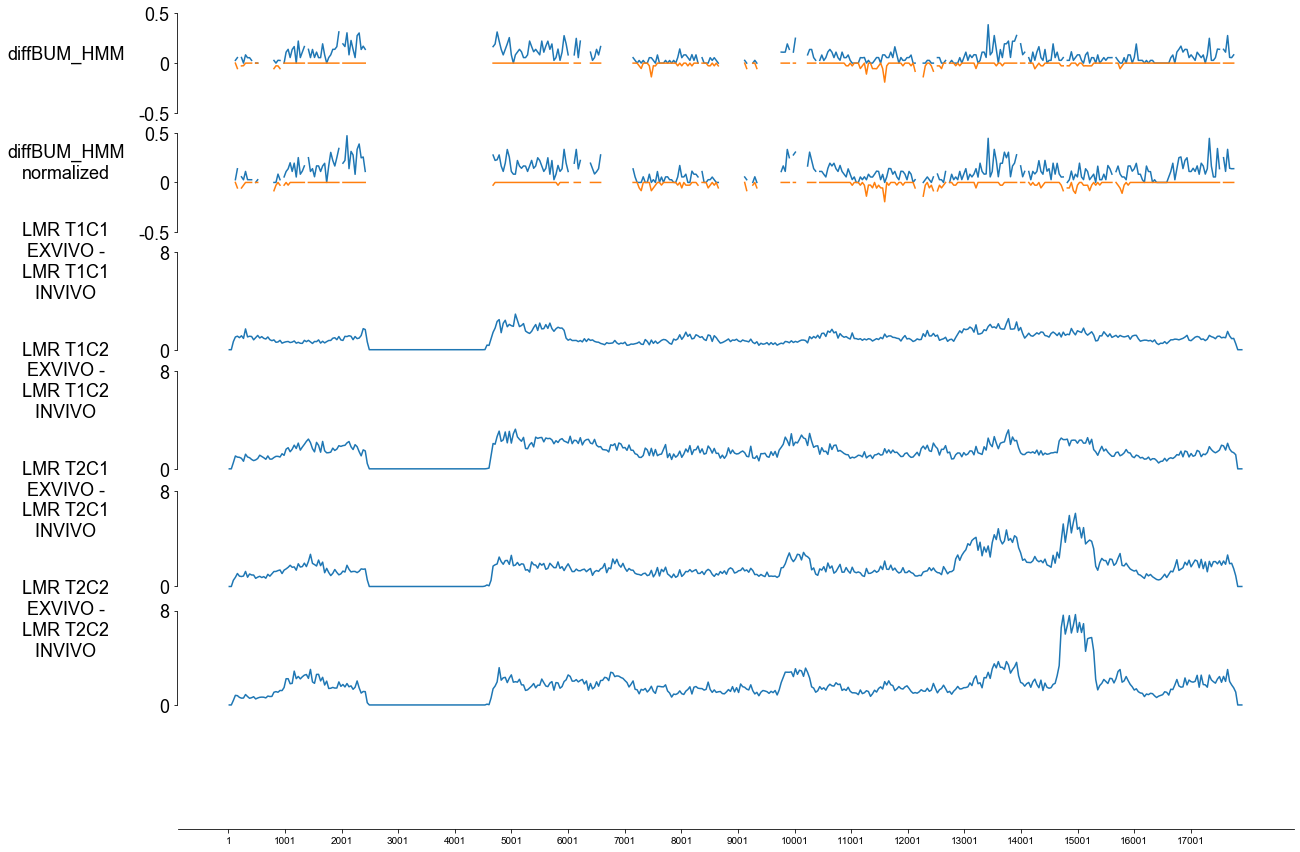

In [16]:
count = 0
numberofplots = 7
threshold = 0.95
nbins = 500

xticks = list(np.arange(1,len(alldata.index),1000))

fig,ax = plt.subplots(numberofplots,figsize=[20,15],sharex=True)

nucleotides = alldata.index
nucleotides = np.squeeze(nucleotides)

### plotting diffBUM_HMM not normalized:

exvivo = alldata.ex_vivo.values
invivo = alldata.in_vivo.values

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

exvivo[exvivo < threshold] = 0 
invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean*(-1))

ymin = -0.5
ymax = 0.5
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

count += 1



### plotting diffBUM_HMM normalized:

exvivo = alldata.scaled_ex_vivo.values
invivo = alldata.scaled_in_vivo.values

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

exvivo[exvivo < threshold] = 0 
invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean*(-1))

ymin = -0.5
ymax = 0.5
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM\nnormalized',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

count += 1

### plotting diffBUM_HMM normalized: -CHANGED 


#LMR1C1EXVIVO	LMR2C2EXVIVO	LMR1C1INVIVO	LMR2C2INVIVO

exvivo = alldata.LMRT1C1.values
#invivo = alldata.LMR2C2.values

exvivo= np.squeeze(exvivo)
#invivo= np.squeeze(invivo)

#exvivo[exvivo < threshold] = 0 
#invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)



ax[count].errorbar((_[1:] + _[:-1])/2, mean)
formatAxes(ax[count],ylabel='LMR T1C1\n EXVIVO - \nLMR T1C1\n INVIVO ',text_size=18, yticklabels = [0,8], yticks = [0,8])




count += 1
#LMR1C1EXVIVO	LMR2C2EXVIVO	LMR1C1INVIVO	LMR2C2INVIVO


exvivo = alldata.LMRT1C2.values
#invivo = alldata.LMR2C2.values

exvivo= np.squeeze(exvivo)
#invivo= np.squeeze(invivo)

#exvivo[exvivo < threshold] = 0 
#invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)



ax[count].errorbar((_[1:] + _[:-1])/2, mean)
formatAxes(ax[count],ylabel='LMR T1C2\n EXVIVO - \nLMR T1C2\n INVIVO ',text_size=18, yticklabels = [0,8], yticks = [0,8])




count += 1



exvivo = alldata.LMRT2C1.values
#invivo = alldata.LMR2C2.values

exvivo= np.squeeze(exvivo)
#invivo= np.squeeze(invivo)

#exvivo[exvivo < threshold] = 0 
#invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)



ax[count].errorbar((_[1:] + _[:-1])/2, mean)
formatAxes(ax[count],ylabel='LMR T2C1\n EXVIVO - \nLMR T2C1\n INVIVO ',text_size=18, yticklabels = [0,8], yticks = [0,8])





count += 1

#LMR1C1EXVIVO	LMR2C2EXVIVO	LMR1C1INVIVO	LMR2C2INVIVO

exvivo = alldata.LMRT2C2.values
#invivo = alldata.LMR2C2.values

exvivo= np.squeeze(exvivo)
#invivo= np.squeeze(invivo)

#exvivo[exvivo < threshold] = 0 
#invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)



ax[count].errorbar((_[1:] + _[:-1])/2, mean)
formatAxes(ax[count],ylabel='LMR T2C2\n EXVIVO - \nLMR T2C2\n INVIVO ',text_size=18, yticklabels = [0,8], yticks = [0,8])



count += 1
x = alldata.index
y = alldata['TARDBP']
ax[count].set_xticks(np.arange(alldata.index[0],alldata.index[-1],1000))
ax[count].set_xticklabels(np.arange(alldata.index[0],alldata.index[-1],1000))
ax[count].set_yticks([])

# Only show the bottom spine
ax[count].spines['right'].set_visible(False)
ax[count].spines['left'].set_visible(False)
ax[count].spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax[count].xaxis.set_ticks_position('bottom')
ax[count].scatter(x,y,s=0)

#fig.align_ylabels()
output_filename = "Figures_S6_%s.pdf" % threshold
fig.savefig(output_filename,dpi=300)